# Speaker Vector

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/speaker-vector](https://github.com/huseinzol05/malaya-speech/tree/master/example/speaker-vector).
    
</div>

<div class="alert alert-warning">

This is an application of malaya-speech Pipeline, read more about malaya-speech Pipeline at [malaya-speech/example/pipeline](https://github.com/huseinzol05/malaya-speech/tree/master/example/pipeline).
    
</div>

In [1]:
from malaya_speech import Pipeline
import malaya_speech
import numpy as np

### List available deep model

In [2]:
malaya_speech.speaker_vector.available_model()

INFO:root:tested on VoxCeleb2 test set. Lower EER is better.


,Size (MB),Embedding Size,EER
deep-speaker,96.7,512.0,0.21870
vggvox-v1,70.8,1024.0,0.14070
vggvox-v2,43.2,512.0,0.04450
speakernet,35.0,7205.0,0.02122


**Smaller EER the better model is**.

### Load deep model

In [3]:
model = malaya_speech.speaker_vector.deep_model('speakernet')

In [4]:
from glob import glob

speakers = glob('speech/example-speaker/*.wav')
speakers

['speech/example-speaker/khalil-nooh.wav',
 'speech/example-speaker/mas-aisyah.wav',
 'speech/example-speaker/shafiqah-idayu.wav',
 'speech/example-speaker/husein-zolkepli.wav']

### Pipeline

In [5]:
def load_wav(file):
    return malaya_speech.load(file)[0]

p = Pipeline()
frame = p.foreach_map(load_wav).map(model)

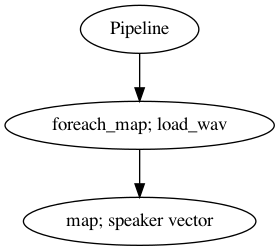

In [6]:
p.visualize()

In [7]:
r = p.emit(speakers)

### Calculate similarity

In [8]:
from scipy.spatial.distance import cdist

1 - cdist(r['speaker-vector'], r['speaker-vector'], metric = 'cosine')

array([[1.        , 0.85895567, 0.85036785, 0.91986299],
       [0.85895567, 1.        , 0.88895714, 0.85086468],
       [0.85036785, 0.88895714, 1.        , 0.86070391],
       [0.91986299, 0.85086468, 0.86070391, 1.        ]])

Remember, our files are,

```python
['speech/example-speaker/khalil-nooh.wav',
 'speech/example-speaker/mas-aisyah.wav',
 'speech/example-speaker/shafiqah-idayu.wav',
 'speech/example-speaker/husein-zolkepli.wav']
```

If we check first row,

```python
[1.        , 0.85895567, 0.85036785, 0.91986299]
```

second biggest is `0.91986299`, which is 4th column, for `husein-zolkepli.wav`. So the speaker vector knows `khalil-nooh.wav` sounds similar to `husein-zolkepli.wav` due to gender factor.